<a href="https://colab.research.google.com/github/pingstech/ZeroToHero-ML/blob/main/10_MachineLearning_RandomForestRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
 
file_id = "1ndDC-N0A22oz91QIghOKtfTUukpeCv3w"
 
downloaded = drive.CreateFile({'id': file_id})
 
downloaded.GetContentFile("random_forest_regression_dataset.csv")

In [ ]:
#Random Forest, Ensemble Learning'in üyesidir.
#Ensemble Learning, aynı anda pek çok algoritmayı kullanarak elde edilen bir modeldir.
#Aynı anda birden fazla machine learning algoritmasını kullanıp ortalamasını alıyor diyebiliriz.
#Random Forest, Decision Tree'lerin toplamının ortalamasıdır diyebiliriz.

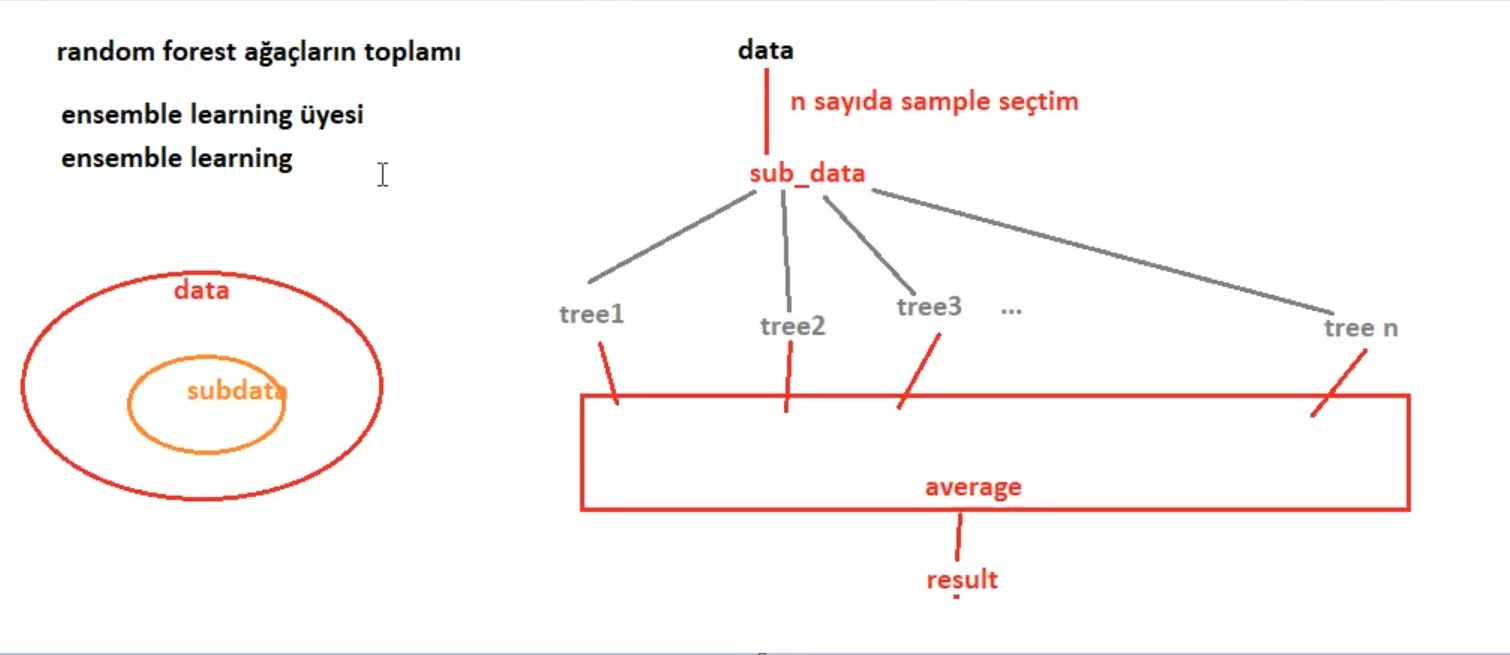

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("random_forest_regression_dataset.csv",sep=";",header=None)
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [ ]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42) #"n_estimators=x" dediğimizde x sayısı ile kaç tane tree kullandığımızı belirliyoruz
                                          #"random_state=x" ise, n sayıda bir random bir sample seçiyorduk ve bu da "sub_data"yı oluşturuyordu
                                          #buradaki x ise random olarak yapılmış "sub_data" kimliğidir. "fit" ettiğimiz zaman sürekli farklı bir 
                                          #sonuç elde etmemek için ona bir kimlik atamış oluyoruz.
rf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
print("7.5 seviyesinde fiyatın ne kadar olduğuğu:",float(rf.predict([[7.5]])))

7.5 seviyesinde fiyatın ne kadar olduğuğu: 28.0


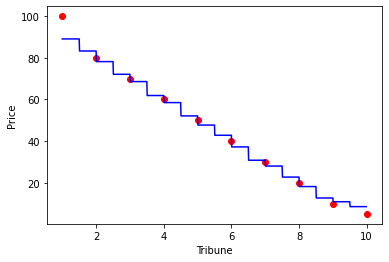

In [ ]:
#Bunun decision tree'den farkı, decision tree'den 100 tane kullanmış olmamız
newX=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=rf.predict(newX)
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(newX,y_head,color="blue",label="Predicted Values")
plt.xlabel("Tribune")
plt.ylabel("Price")
plt.show()